<a href="https://colab.research.google.com/github/aykq/internship/blob/main/tensorflow/02_convolutional_neural_networks_and_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision with TensorFlow

Now we're going to get specific and see how a special kind o neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

For example, you might want to:
+ Classify whether a picture of food contains pizza or steak.
+ Detect whether or not an object appears in an image (e.g. did a specific car pass through a securtiy camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

---
# What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

+ Getting a dataset to work with

+ Architecture of a convolutional neural network

+ A quick ent-to-end example (what we're working towards)

+ Steps in modelling for binary image classification with CNNs
    
    + Becoming one with the data
    
    + Preparing data for modelling
    
    + Creating a CNN model (starting with a baseline)
    
    + Fitting a model (getting it to find patterns in our data)
    
    + Evaluating a model
    
    + Improving a model
    
    + Making a prediction with a trained model
    
+ Steps in modelling for multi-class image classification with CNNs

+ Same as above (but this time with a different dataset)

---
# Get the data

Because convoutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza and steak and build a binary classifier.

We'll download the pizza_steak subset .zip file and unzip it.

In [1]:
import zipfile

# download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-17 05:49:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.9MB/s    in 5.9s    

2023-07-17 05:49:54 (17.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



---
# Inspect the data (become one with it)

This usually means plent of visualizing and folder scanning to understand the data you're working with.

With this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
+ A 'train' directory which contains all of the images in the training dataset with subdirectories each named after a certain class containin images of that class.
+ A 'test' directory with the same structure as the 'train' directory.

In [2]:
"""
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...

"""

'\nExample of file structure\n\npizza_steak <- top level folder\n└───train <- training images\n│   └───pizza\n│   │   │   1008104.jpg\n│   │   │   1638227.jpg\n│   │   │   ...\n│   └───steak\n│       │   1000205.jpg\n│       │   1647351.jpg\n│       │   ...\n│\n└───test <- testing images\n│   └───pizza\n│   │   │   1001116.jpg\n│   │   │   1507019.jpg\n│   │   │   ...\n│   └───steak\n│       │   100274.jpg\n│       │   1653815.jpg\n│       │   ...\n\n'

Let's inspect each of the directories we've downloaded.

To so do, we can use the command 'ls' which stands for 'list'. (in linux)

We can use the command 'dir' in windows.

In [3]:
!ls pizza_steak

test  train


We can see we've got a 'train' and 'test' folder.

Let's see what's inside of them.

In [4]:
!ls pizza_steak/train

# !ls pizza_steak\train\ (in windows)

pizza  steak


And how about inside the 'steak' directory?

In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

A whole bunch of images. But how many?

In [6]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# get the class names (programmatically, this is much more helpful with a longer list of classes)

import pathlib
import numpy as np

# turn our training path to python path
data_dir = pathlib.Path('pizza_steak/train/')
# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


So we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

**visualize, visualize, visualize**

In [9]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplotlib
    # show the shape of the image
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'image shape: {img.shape}')  # show the shape of image

    return img

image shape: (512, 512, 3)


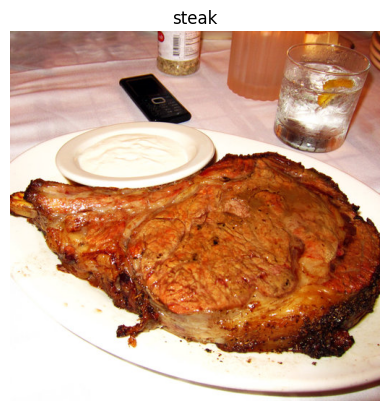

In [10]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor)

In [11]:
# view the img (actually just a big array/tensor)
img

array([[[136, 114,  93],
        [139, 117,  96],
        [141, 120,  99],
        ...,
        [130,  52,  16],
        [145,  55,  20],
        [153,  57,  19]],

       [[142, 119, 101],
        [144, 121, 103],
        [144, 123, 104],
        ...,
        [128,  54,  19],
        [148,  60,  22],
        [155,  58,  16]],

       [[143, 120, 106],
        [146, 123, 109],
        [147, 124, 110],
        ...,
        [119,  50,  19],
        [145,  62,  20],
        [156,  61,  13]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [164, 123, 117],
        [161, 120, 114],
        [160, 119, 113]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [160, 117, 111],
        [157, 114, 108],
        [155, 112, 106]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [153, 110, 104],
        [150, 105, 100],
        [148, 103,  98]]

In [12]:
# view the image shape
img.shape  # width, height, color channels

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (width, height, color channels).

You'll notice all of the values in the 'img' array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [13]:
# get all the pixel values between 0 % 1 (normalize)
img / 255.0

array([[[0.53333333, 0.44705882, 0.36470588],
        [0.54509804, 0.45882353, 0.37647059],
        [0.55294118, 0.47058824, 0.38823529],
        ...,
        [0.50980392, 0.20392157, 0.0627451 ],
        [0.56862745, 0.21568627, 0.07843137],
        [0.6       , 0.22352941, 0.0745098 ]],

       [[0.55686275, 0.46666667, 0.39607843],
        [0.56470588, 0.4745098 , 0.40392157],
        [0.56470588, 0.48235294, 0.40784314],
        ...,
        [0.50196078, 0.21176471, 0.0745098 ],
        [0.58039216, 0.23529412, 0.08627451],
        [0.60784314, 0.22745098, 0.0627451 ]],

       [[0.56078431, 0.47058824, 0.41568627],
        [0.57254902, 0.48235294, 0.42745098],
        [0.57647059, 0.48627451, 0.43137255],
        ...,
        [0.46666667, 0.19607843, 0.0745098 ],
        [0.56862745, 0.24313725, 0.07843137],
        [0.61176471, 0.23921569, 0.05098039]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

---
# A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

**Input images(s):** Target images you'd like to discover patterns in

**Input layer:** Takes in target images and preprocesses them for further layers.

**Convolutional layer:** Extracts/learns the most important features from target images.

**Hidden activation:** Adds non-linearity to learned features

**Pooling layer:** Reduces the dimensionality of learned image features

**Fullt connected layer:** Further refines learned features from convolutional layers

**Output layer:** Takes learned features and outputs them in shape of target labels.

**Output activation:** Adds non-linearities to output layer.

[How they stack together:](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)

---
# An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original dataset authors papaer](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

+ Note: A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create baseline and try to beat it by increasing the complexity of the model.

The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,  # number of images to process at a time
                                               # convert all images to be 224 x 224
                                               target_size=(224, 224),
                                               class_mode="binary",  # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,  # can also be (3, 3)
                           activation="relu",
                           input_shape=(224, 224, 3)),  # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,  # pool_size can also be (2, 2)
                              padding="valid"),  # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 354ms/step - loss: 0.5670 - accuracy: 0.7120 - val_loss: 0.3931 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 13s 281ms/step - loss: 0.4317 - accuracy: 0.7967 - val_loss: 0.4289 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4138 - accuracy: 0.8160 - val_loss: 0.4117 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.3593 - accuracy: 0.8480 - val_loss: 0.3116 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 11s 245ms/step - loss: 0.3237 - accuracy: 0.8673 - val_loss: 0.3651 - val_accuracy: 0.8400


After 5 epochs, our model beat the baseline score of 50.76% accuracy.

However, our model only went through a binary classification problem rather than all of the 101 classes in the food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

Since we've already fit a model, let's check out its architecture.

In [15]:
# check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

What do you notice about the names of model_1's layers and the layer names at the top of the CNN explainer website?

We've replicated the exact architecture they use for their model demo.

Now there are a few new things here we haven't discussed, namely:
+ The `ImageDataGenerator` class and the 'rescale' parameter
+ The `flow_from_directory()` method
    + The `batch_size` parameter
    + The `target_size` parameter
+ Conv2D layers (and the parameters which come with them)
+ MaxPool2D layers (and their parameters)
+ The `steps_per_epoch` and `validaton_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

---
# Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all of the same parameters in our previous model except for changing two things:
+ **The data** - we're now working with images instead of dots.
+ **The input shape** - we have to tell our neural network the shape of the images we're working with.
  + A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for red, green, blue color channels.

In [16]:
tf.random.set_seed(42)

# create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 234ms/step - loss: 1.0285 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 265ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

In [17]:
# check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.


You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

+ Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [18]:
import tensorflow as tf

tf.random.set_seed(42)

# create a similar model to model_1 but add an extra layer and increase the number of hidden units in each layer.
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 230ms/step - loss: 3.4569 - accuracy: 0.6233 - val_loss: 0.9500 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 1.0171 - accuracy: 0.6813 - val_loss: 1.8159 - val_accuracy: 0.5820
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.8077 - accuracy: 0.7453 - val_loss: 0.4404 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.7317 - accuracy: 0.7293 - val_loss: 0.4906 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.5031 - accuracy: 0.7620 - val_loss: 0.4252 - val_accuracy: 0.7980


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecute look?

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

---
# Binary classification: Let's break it down

We just went through a whirlwind of steps.
1. Become one with the data (**visualize, visualize, visualize**)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied.

Let's step through each.

## 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

Note: If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.



In [22]:
# import zipfile

# download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded files
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-17 06:02:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.2MB/s    in 5.9s    

2023-07-17 06:02:16 (17.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



image shape: (384, 512, 3)
image shape: (512, 512, 3)


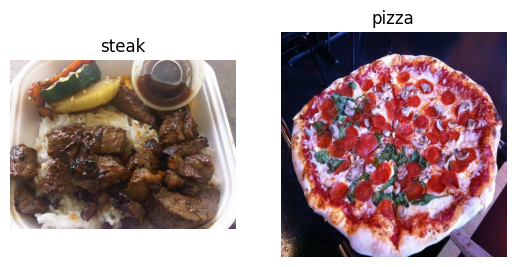

In [23]:
# visualize data (requires function 'view_random_image' above)

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

---
## 2. Preprocess the data (prepare it for model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standart to have your data seperated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [24]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
+ 10,000 images (or more) might not fit into the memory of your processor (GPU).
+ Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

There are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets.

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The `rescale` parameter, along with `1/255`. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the `flow_from_directory` method.

In [26]:
# turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:
+ Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
+ The `target_size` parameter defines the input size of our images in `(height, width)` format.
+ The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use 'categorical'.
+ The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.



In [27]:
# get a sample of the training data batch
images, labels = train_data.next() # get the next() batch of images/labels
len(images), len(labels)

(32, 32)